###### import libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Read dafaset

In [3]:
df =pd.read_csv('dataset/deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


###### Indept Analysis of David Werner(Australian Batsman) Performance. 

In [4]:
## filter DA werner data(rowa and columns)
filt = df['batsman'] == 'DA Warner'
df_werner = df[filt]
df_werner.shape

(2902, 21)

In [5]:
df_werner.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
## count the dismissal_kind.
df_werner['dismissal_kind'].value_counts()

caught               62
bowled               21
run out               8
lbw                   4
stumped               4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

<AxesSubplot:ylabel='dismissal_kind'>

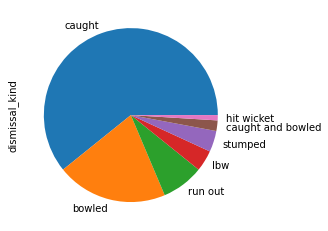

In [7]:
#plot the dismissal_kind
df_werner['dismissal_kind'].value_counts().plot.pie()

In [8]:
### analysing the batsman_runs.
len(df_werner[df_werner['batsman_runs']==4])

401

In [9]:
len(df_werner[df_werner['batsman_runs']==6])

160

In [10]:
##write a function to return the total number of runs.
def count(df,runs):
    return len((df_werner[df_werner['batsman_runs']==runs]))*runs

In [11]:
count(df_werner,1)

997

In [12]:
count(df_werner,2)

414

In [13]:
count(df_werner,3)

39

In [14]:
count(df_werner,4)

1604

In [15]:
count(df_werner,6)

960

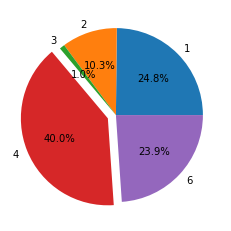

In [16]:
### collect the data above inform of a numpy array and plot it.

slice = [997,414,39,1604,960]
labels = [1,2,3,4,6]
explode = [0,0,0,0.1,0]
plt.pie(slice,labels=labels,autopct='%1.1f%%',explode=explode)
plt.show()

###### Score Distribution by Each and Average Teams by Innings

In [17]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [18]:
### create Abbreviation of Each of the team.(batting_team and bowling_team)

In [19]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [20]:
### Create the Abbreviations innform of Dict.
Teams = {
    'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
}

In [21]:
## map the abbreviated teams into the teams

df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)

In [22]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [23]:
### getting the score distribution, you need to do a grouby.
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [24]:
df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum()

match_id  inning  batting_team
1         1       SRH             207
          2       RCB             172
2         1       MI              184
          2       RPS             187
3         1       GL              183
                                 ... 
634       2       KKR             140
635       1       GL              162
          2       SRH             163
636       1       SRH             208
          2       RCB             200
Name: total_runs, Length: 1284, dtype: int64

In [25]:
## reset index, store in new df and drop match_id
runs =df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)
runs

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183
...,...,...,...
1279,2,KKR,140
1280,1,GL,162
1281,2,SRH,163
1282,1,SRH,208


In [26]:
## group innings

inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

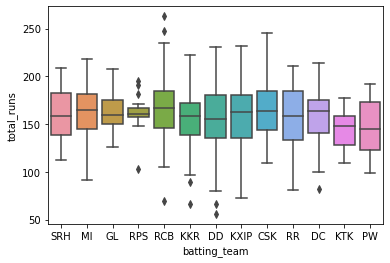

In [27]:
##plot inning1
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

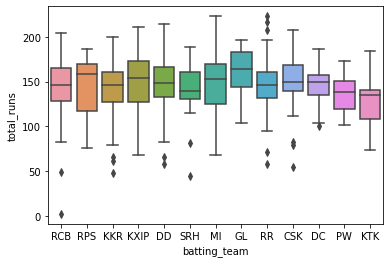

In [28]:
##plot inning2
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

###### How many Teams Score more than 200?

In [29]:
## Do a groupby
df.groupby(['match_id', 'inning', 'batting_team','bowling_team'])['total_runs'].sum()

match_id  inning  batting_team  bowling_team
1         1       SRH           RCB             207
          2       RCB           SRH             172
2         1       MI            RPS             184
          2       RPS           MI              187
3         1       GL            KKR             183
                                               ... 
634       2       KKR           SRH             140
635       1       GL            SRH             162
          2       SRH           GL              163
636       1       SRH           RCB             208
          2       RCB           SRH             200
Name: total_runs, Length: 1284, dtype: int64

In [30]:
### reset_index
higher_score=df.groupby(['match_id', 'inning', 'batting_team','bowling_team'])['total_runs'].sum().reset_index()
higher_score

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1279,634,2,KKR,SRH,140
1280,635,1,GL,SRH,162
1281,635,2,SRH,GL,163
1282,636,1,SRH,RCB,208


In [31]:
## filter where total_runs equal to 200.
score_200 = higher_score[higher_score['total_runs']>=200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1250,620,1,RCB,GL,248
1256,623,1,MI,DD,206
1262,626,1,RCB,KXIP,211
1282,636,1,SRH,RCB,208


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batting_team', ylabel='count'>

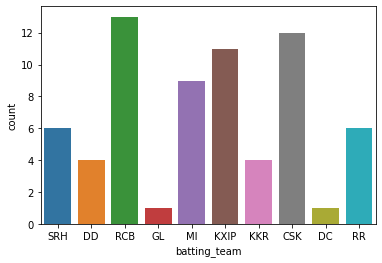

In [32]:
##plot batting_team
sns.countplot(score_200['batting_team'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bowling_team', ylabel='count'>

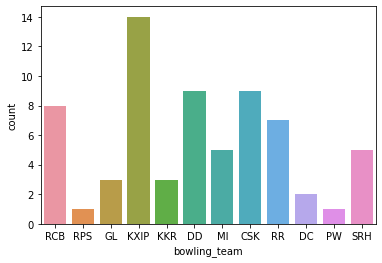

In [33]:
##plot bownling_team
sns.countplot(score_200['bowling_team'])

###### Batsman Comparison

In [38]:
### How many balls played by each batman.

balls=df.groupby('batsman')['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


In [41]:
### total runs made by each batsman
runs=df.groupby('batsman')['batsman_runs'].sum().reset_index()
runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591
